In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1. Read the csv file (use the `read_csv` function).

In [2]:
df = pd.read_csv("bestsellers with categories.csv")

## 2. Display the first five rows (use the `head` function).

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## 3. Display the dimensions of the dataset (use the `shape` attribute).

In [4]:
df.shape

(550, 7)

### **Question**: How many books are data stored for in the dataset?

**Answer:** 550

## 5. To simplify your work, change the variable names slightly.

In [5]:
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]

# **Initial Data Exploration**

## 1. Check if all rows contain a sufficient amount of data: print the number of empty places (`na`) in each column using the `isna` and `sum` functions.

### **Question**: Are there any variables with missing values? (Yes / No)

In [6]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

**Answer:** No

## 2. Check the unique values in the 'genre' column using the `unique` function.

## **Question**: What are the unique genres?

In [7]:
df["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

**Answer: Non Fiction, Fiction**

## 3. Examine the price distribution: build a histogram (use `kind='hist'`).

<Axes: >

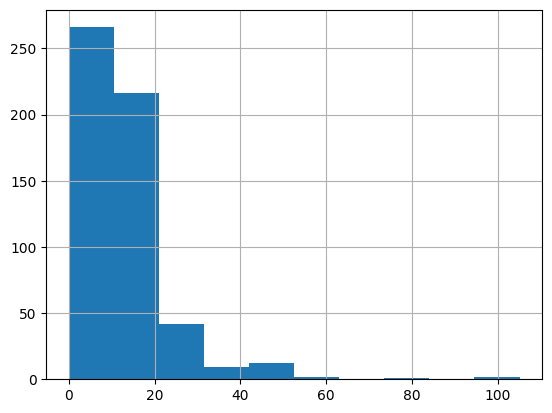

In [8]:
df["price"].hist()

## 4. Determine the maximum, minimum, average, and median prices using the `max`, `min`, `mean`, `median` functions.

### **Question:** Maximum price?

In [9]:
df["price"].max()

105

**Answer:** 105

### **Question:** Minimum price?

In [10]:
df["price"].min()

0

**Answer:** 0

### **Question:** Average price?

In [11]:
df["price"].mean()

13.1

**Answer:** 13.1

### **Question:** Median price?

In [12]:
df["price"].median()

11.0

**Answer:** 11

# **Data Searching and Sorting**

## 1. Answer questions.

### **Question:** What is the highest rating in the dataset?

In [13]:
max_rating = df["user_rating"].max()
max_rating

4.9

**Answer:** 4.9

### **Question:** How many books have such a rating?

In [14]:
df[df["user_rating"] == max_rating].shape[0]

52

**Answer:** 52

### **Question:** Which book has the most reviews?

In [15]:
df[df["reviews"] == df['reviews'].max()]['name'].iloc[0]

'Where the Crawdads Sing'

**Answer:** "Where the Crawdads Sing"

### **Question:** Which of the books from the Top 50 in 2015 is the most expensive (use an intermediate dataframe)?

In [16]:
books_2015 = df[df["year"] == 2015]
sorted_books_2015 = books_2015.sort_values(by="user_rating", ascending=False)
top_50_books_2015 = sorted_books_2015[:50]
most_expensive_book_2015 = top_50_books_2015[top_50_books_2015["price"] == top_50_books_2015["price"].max()]
most_expensive_book_2015[["name", "user_rating" ,"price"]]

,name,user_rating,price
277,Publication Manual of the American Psychologic...,4.5,46


**Answer:** Publication Manual of the American Psychological Association, 6th Edition

### **Question:** How many books of the Fiction genre were in the Top 50 in 2010 (use `&`)? 

In [17]:
books_2010 = df[df["year"] == 2010]
sorted_books_2010 = books_2010.sort_values(by="user_rating", ascending=False)
top_50_books_2010 = sorted_books_2010[:50]
fiction_books_2010 = top_50_books_2010[top_50_books_2010['genre'] == 'Fiction']
# fiction_books_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
fiction_books_2010.shape[0]

20

**Answer:** 20

### **Question:** How many books with a rating of 4.9 were in the rankings in 2010 and 2011 (use `|` or the `isin` function)?

In [18]:
years_filter = df['year'].isin([2010, 2011])
# years_filter = df[df['year'] == 2010 | df['year'] == 2011]
rating_filter = df['user_rating'] == 4.9
books_with_4_9_rating = df[years_filter & rating_filter] # Combine filters
books_with_4_9_rating.shape[0] # Count the number of such books

1

**Answer:** 1

## 2. Finally, sort ascending by price all books that were in the ranking in 2015 and cost less than 8 dollars (use the `sort_values` function).

In [19]:
filtered_books_2015_less_than_8 = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_books_2015_less_than_8 = filtered_books_2015_less_than_8.sort_values(by='price', ascending=True)

### **Question:** Which book is last on the sorted list?

In [20]:
sorted_books_2015_less_than_8.iloc[-1]

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object

**Answer:** Old School (Diary of a Wimpy Kid #10)

# **Data Aggregation and Table Joining**

## 1. First, let's look at the maximum and minimum prices for each genre (use the `groupby` and `agg` functions along with `max` and `min` to calculate the minimum and maximum values). Do not select all columns, only those you need.

In [21]:
price_stats_by_genre = df.groupby('genre')['price'].agg(['max', 'min'])

### **Question:** Maximum price for the Fiction genre?

In [22]:
max_price_fiction = price_stats_by_genre.loc['Fiction', 'max']
max_price_fiction

82

**Answer:** 80

### **Question:** Minimum price for the Fiction genre?

In [23]:
min_price_fiction = price_stats_by_genre.loc['Fiction', 'min']
min_price_fiction

0

**Answer:** 0

### **Question:** Maximum price for the Non-Fiction genre?

In [24]:
max_price_non_fiction = price_stats_by_genre.loc['Non Fiction', 'max']
max_price_non_fiction

105

**Answer:** 105

### **Question:** Minimum price for the Non-Fiction genre?

In [25]:
min_price_non_fiction = price_stats_by_genre.loc['Non Fiction', 'min']
min_price_non_fiction

0

**Answer:** 0

## 2. Now create a new dataframe that will store the number of books for each author (use the `groupby` and `agg` functions, then use `count` to count the number). Choose only the necessary columns.

In [26]:
books_per_author = df.groupby('author')['name'].agg('count')
books_per_author_df = books_per_author.reset_index()
books_per_author_df.columns = ['author', 'book_count']
books_per_author_df

,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


### **Question:** What is the dimension of the table?

In [27]:
books_per_author_df.shape

(248, 2)

**Answer:** (248, 2)

### **Question:** Which author has the most books?

In [28]:
sorted_books_per_author = books_per_author_df.sort_values('book_count', ascending=False)
author_with_most_books = sorted_books_per_author.iloc[0]
author_with_most_books.author

'Jeff Kinney'

**Answer:** Jeff Kinney

### **Question:** How many books does this author have?

In [29]:
author_with_most_books.book_count

12

**Answer:** 12

## 3. Create a second dataframe that will contain the average rating for each author (use the `groupby` and `agg` functions, then use `mean` to calculate the average). Choose only the necessary columns.

In [30]:
average_rating_per_author = df.groupby('author')['user_rating'].agg('mean')
average_rating_per_author_df = average_rating_per_author.reset_index()
average_rating_per_author_df.columns = ['author', 'average_rating']
average_rating_per_author_df

,author,average_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


### **Question:** Which author has the lowest average rating?

In [31]:
sorted_average_rating_per_author = average_rating_per_author_df.sort_values('average_rating', ascending=True)
author_with_lowest_rating = sorted_average_rating_per_author.iloc[0]
author_with_lowest_rating.author

'Donna Tartt'

**Answer:** Donna Tartt

### **Question:** What is the average rating of this author?

In [32]:
author_with_lowest_rating.average_rating

3.9

**Answer:** 3.9

## 4. Combine the last two dataframes to see the number of books and average rating for each author (use the `concat` function with axis=1). Save the result to a variable.

In [33]:
author_stats = pd.concat([books_per_author_df.set_index('author'), average_rating_per_author_df.set_index('author')], axis=1)
author_stats

,book_count,average_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


## 5. Sort the dataframes by ascending number of books and increasing rating (use the `sort_values` function).

In [34]:
sorted_author_stats = author_stats.sort_values(by=['book_count', 'average_rating'], ascending=[True, True])
sorted_author_stats

,book_count,average_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


### **Question:** Which author is first on the list?

In [35]:
sorted_author_stats.iloc[0].name

'Muriel Barbery'

**Answer:** Muriel Barbery